# Baseball Statistics: Hall of Fame

Baseball is a game full of statistics, and most of those statistics have been consistently and carefully tracked going back to the late 1800s. That makes professional baseball a playground for data analysts. Here I look at interesting correlations between players, their stats, and their salaries.

**Data Source:** [Lahman's Baseball Database](http://www.seanlahman.com/baseball-archive/statistics/). The data set I used was through the 2018 season.

Copyright © 2019 Ken Norton (ken@kennethnorton.com)

In [22]:
%run ./1_Data_Preparation.ipynb

To analyze batting stats by position, we'll need to join on the fielding table (to get a player's position).

```
2.4 Fielding Table
playerID       Player ID code
yearID         Year
stint          player's stint (order of appearances within a season)
teamID         Team
lgID           League
Pos            Position
G              Games 
GS             Games Started
InnOuts        Time played in the field expressed as outs 
PO             Putouts
A              Assists
E              Errors
DP             Double Plays
PB             Passed Balls (by catchers)
WP             Wild Pitches (by catchers)
SB             Opponent Stolen Bases (by catchers)
CS             Opponents Caught Stealing (by catchers)
ZR             Zone Rating
------------------------------------------------------------------------------
2.2 Batting Table
playerID       Player ID code
yearID         Year
stint          player's stint (order of appearances within a season)
teamID         Team
lgID           League
G              Games
AB             At Bats
R              Runs
H              Hits
2B             Doubles
3B             Triples
HR             Homeruns
RBI            Runs Batted In
SB             Stolen Bases
CS             Caught Stealing
BB             Base on Balls
SO             Strikeouts
IBB            Intentional walks
HBP            Hit by pitch
SH             Sacrifice hits
SF             Sacrifice flies
GIDP           Grounded into double plays
```

In [23]:
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


Let's add Batting Avg (BAVG) to our dataframe.

In [24]:
batting['BAVG'] = batting['H'] / batting['AB']

In [25]:
batting.BAVG.describe()

count    89521.000000
mean         0.208322
std          0.122852
min          0.000000
25%          0.145833
50%          0.230769
75%          0.273973
max          1.000000
Name: BAVG, dtype: float64

MLB rules say "a player must have 3.1 plate appearances (PA) per team game (for a total of 502 over the current 162-game season) to qualify for the batting title." So let's restrict to only player-seasons with a minimum of 502 ABs.

In [26]:
df = batting[batting['AB'] >= 502]

In [27]:
df.BAVG.describe()

count    8864.000000
mean        0.285004
std         0.031043
min         0.188867
25%         0.263913
50%         0.283004
75%         0.303677
max         0.439703
Name: BAVG, dtype: float64

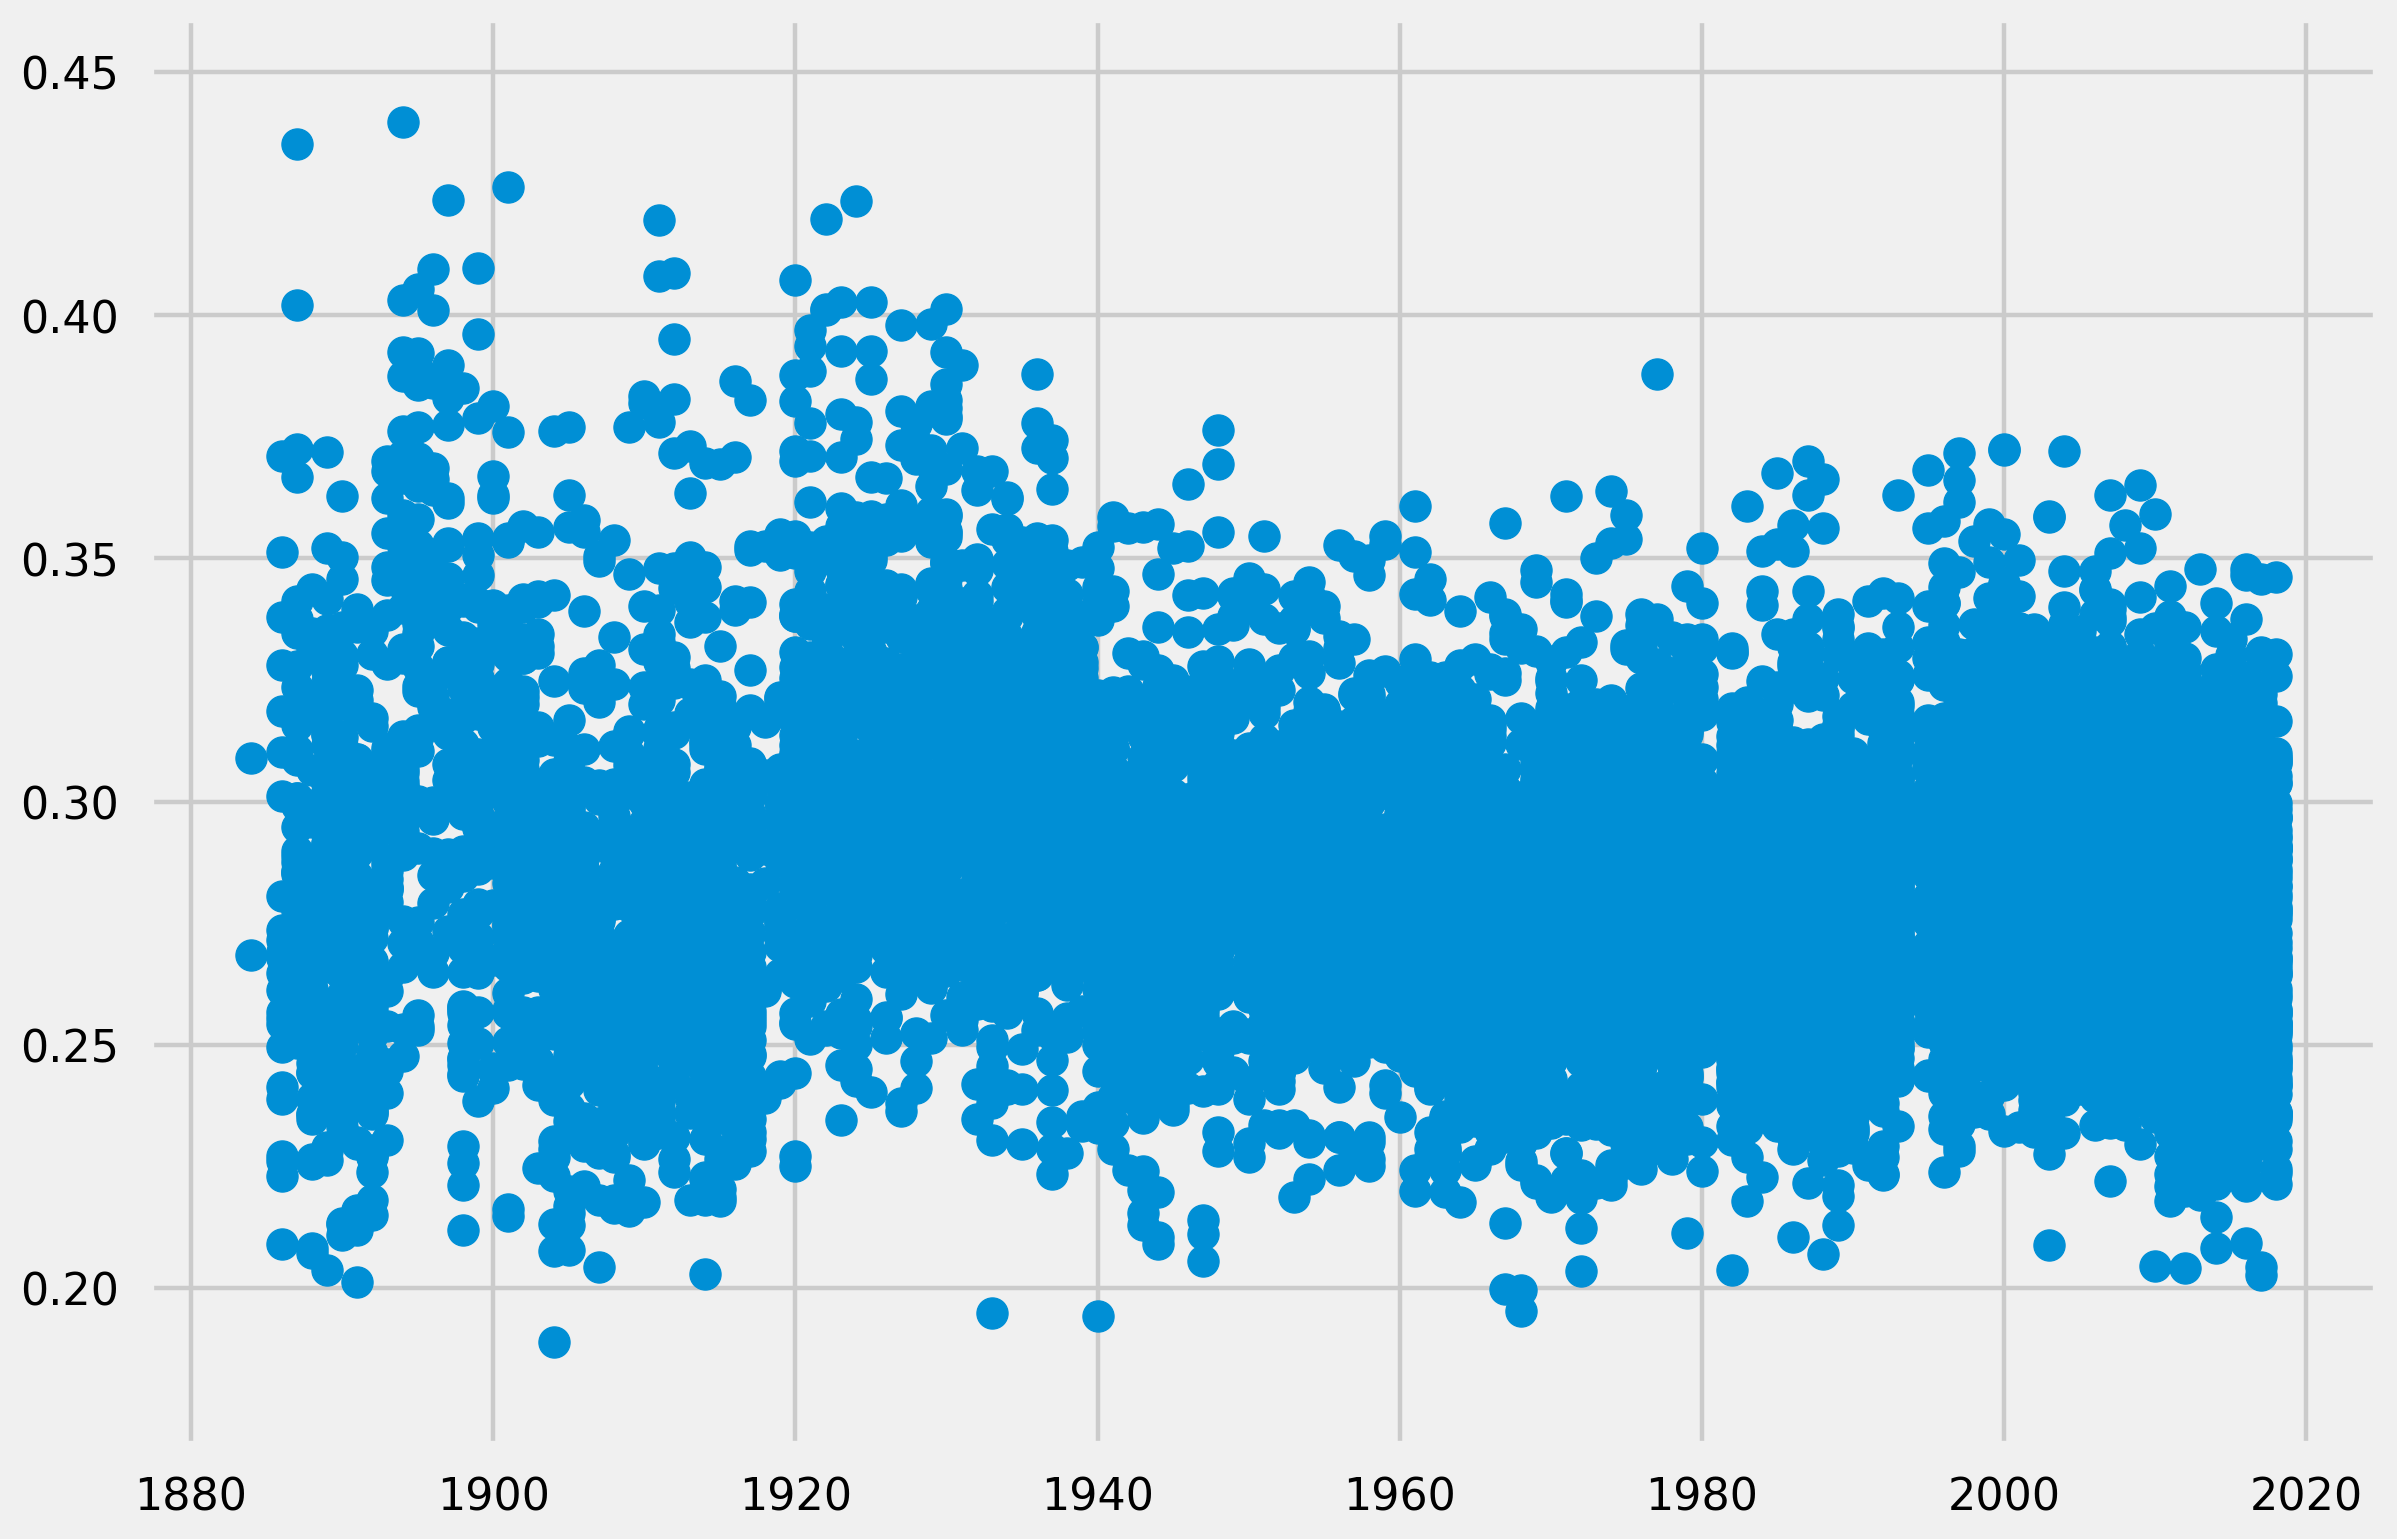

In [28]:
plt.scatter(df['yearID'], df['BAVG'])

Let's just look at the Modern Era* for now.

\* Modern Era = since I became an active fan of the game

In [29]:
df = df[df['yearID'] > 1980]

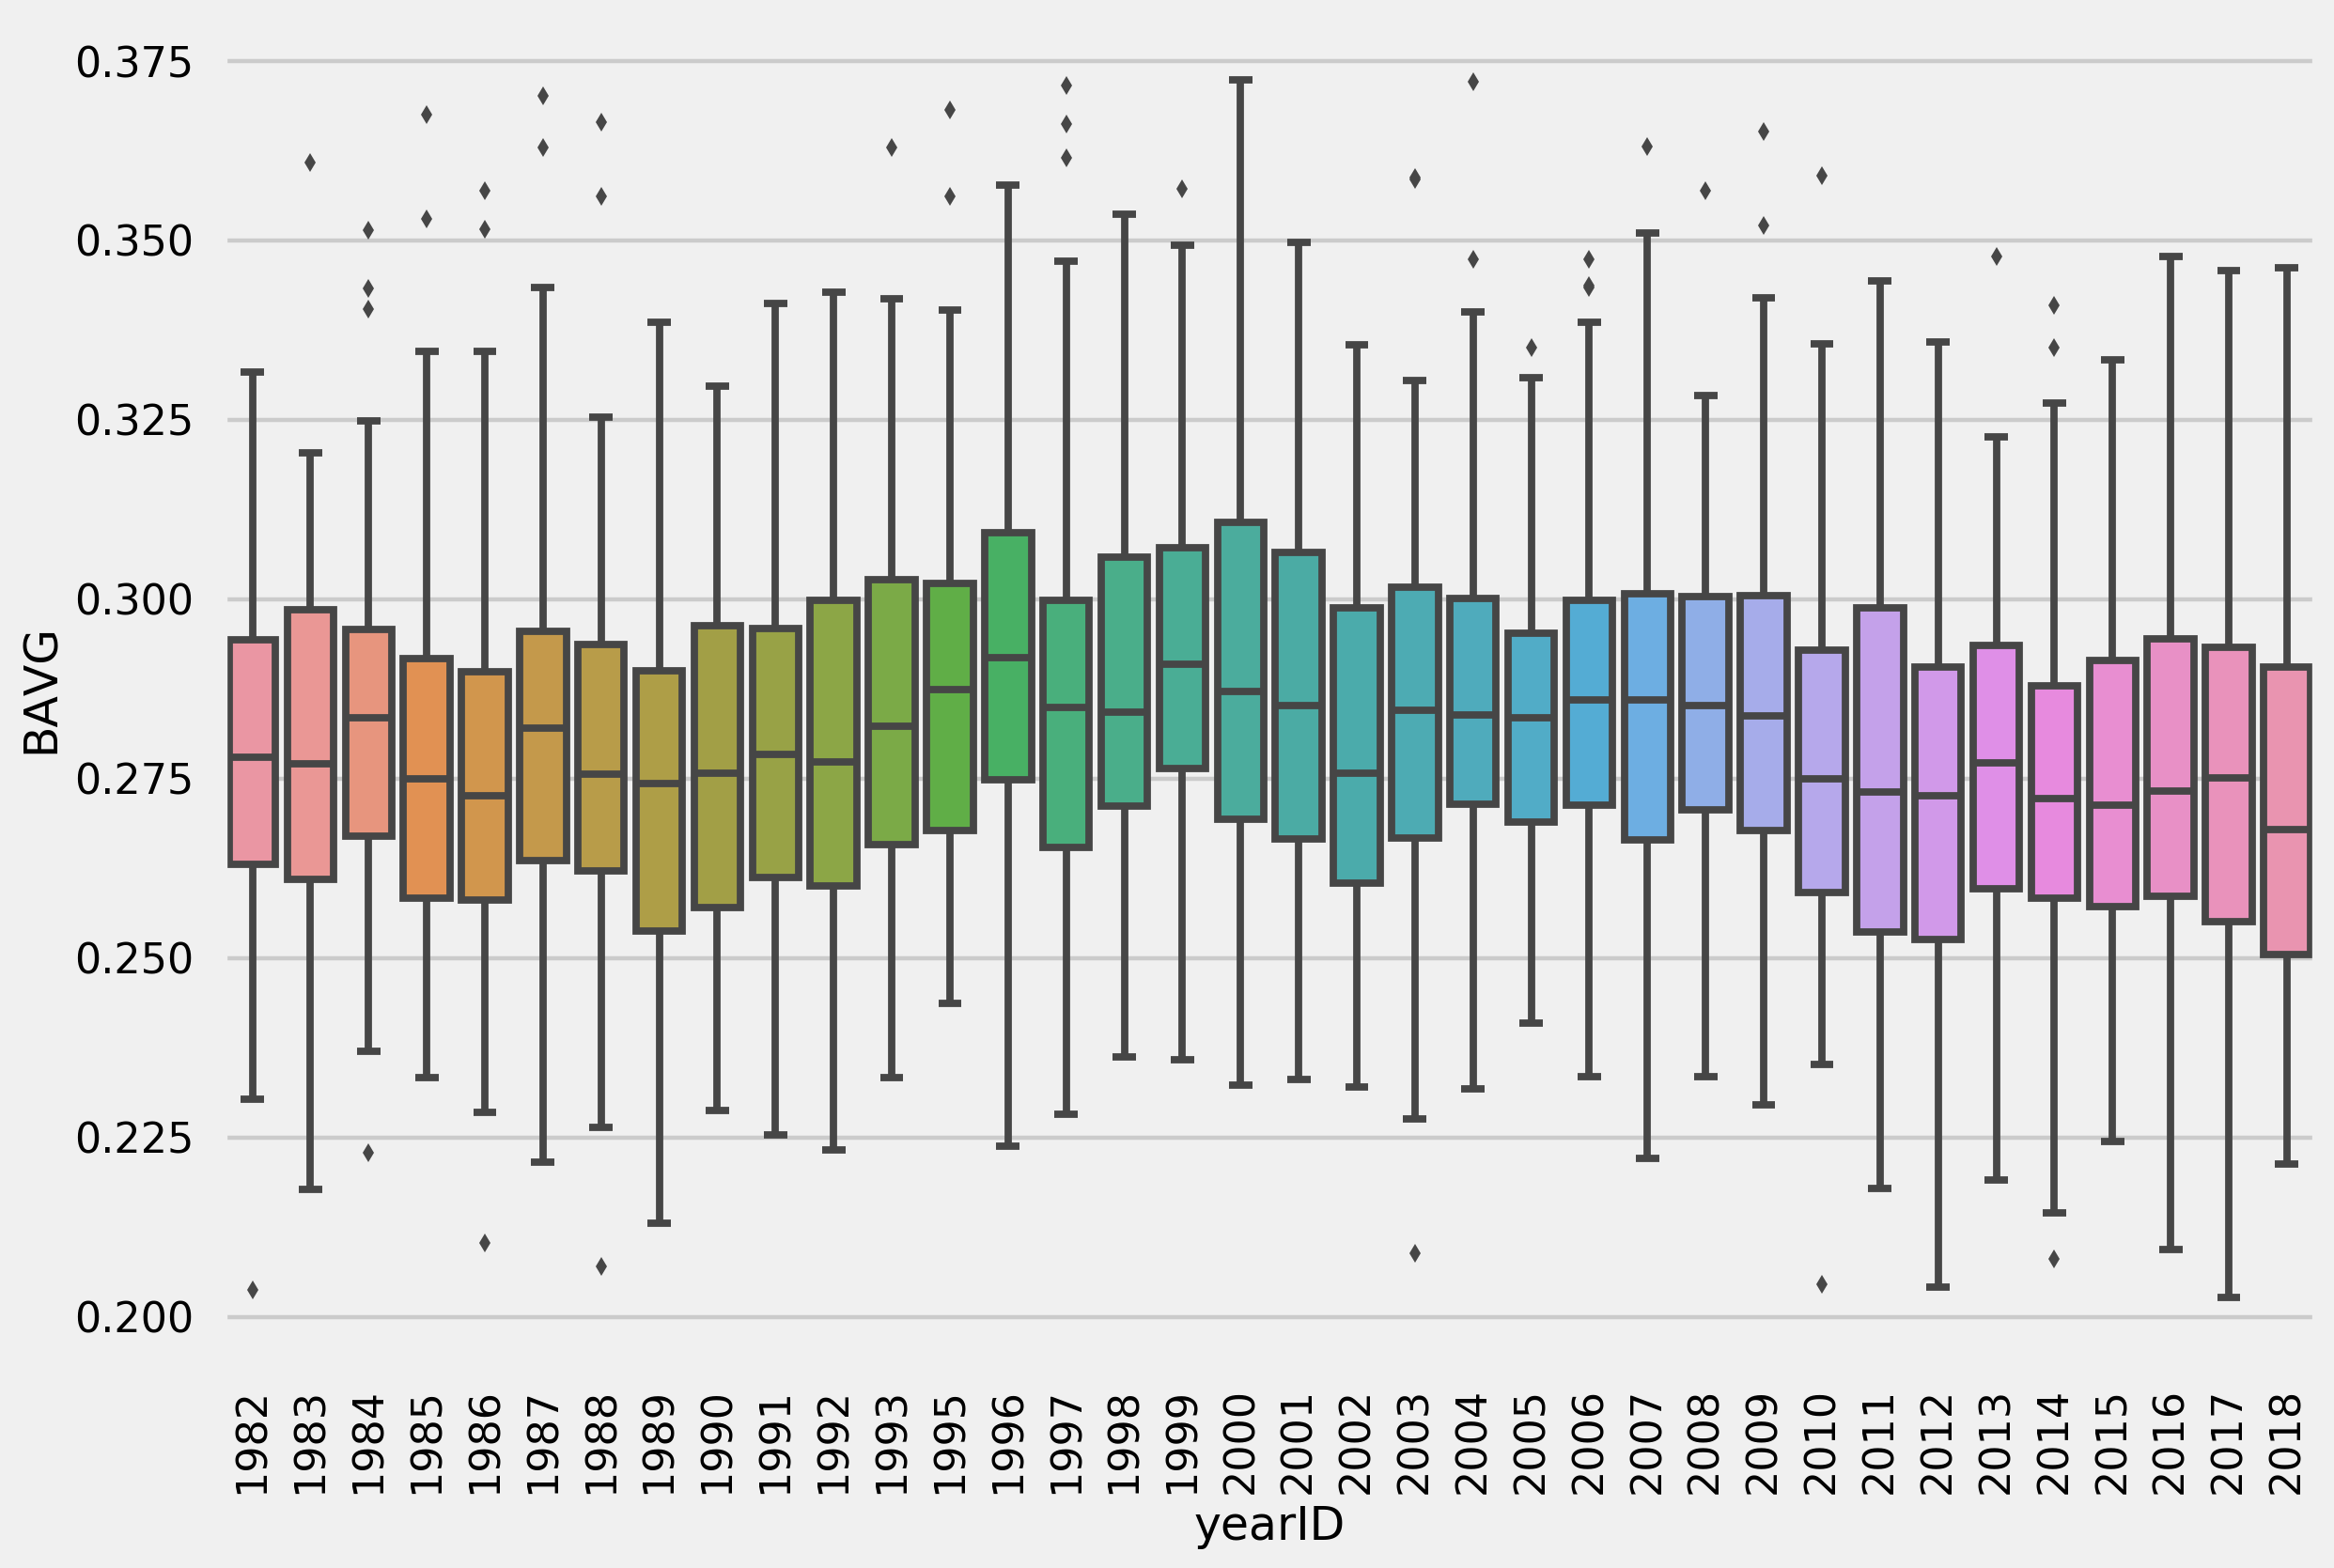

In [30]:
plt.xticks(rotation=90)
sns.boxplot(x="yearID", y="BAVG", data=df)

What were the batting averages of the players who won the batting title each year?

In [31]:
df.groupby(['yearID'], sort=False)['BAVG'].max()

yearID
1982    0.331624
1983    0.360825
1984    0.351485
1985    0.367534
1986    0.356897
1987    0.370119
1988    0.366438
1989    0.338583
1990    0.329749
1991    0.341256
1992    0.342803
1993    0.362976
1995    0.368224
1996    0.357737
1997    0.371622
1998    0.353680
1999    0.357143
2000    0.372414
2001    0.349711
2002    0.335505
2003    0.358714
2004    0.372159
2005    0.335017
2006    0.347409
2007    0.363025
2008    0.356870
2009    0.365201
2010    0.359073
2011    0.344406
2012    0.335849
2013    0.347748
2014    0.340909
2015    0.333333
2016    0.347826
2017    0.345763
2018    0.346154
Name: BAVG, dtype: float64

Who had the best batting average during this period, and who was he?

In [32]:
df.loc[df['BAVG'].idxmax()]

playerID    heltoto01
yearID           2000
stint               1
teamID            COL
lgID               NL
G                 160
AB                580
R                 138
H                 216
2B                 59
3B                  2
HR                 42
RBI               147
SB                  5
CS                  3
BB                103
SO                 61
IBB                22
HBP                 4
SH                  0
SF                 10
GIDP               12
BAVG         0.372414
Name: 79774, dtype: object

In [33]:
people[people['playerID'] == 'heltoto01']

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
7625,heltoto01,1973.0,8.0,20.0,USA,TN,Knoxville,NaN,NaN,NaN,NaN,NaN,NaN,Todd,Helton,Todd Lynn,220.0,74.0,L,L,1997-08-02,2013-09-29,heltt001,heltoto01
